In [3]:
# Display first 10 rows and summary info of the dataset.
import pandas as pd

df = pd.read_excel("C:\\Users\\XNovaQ.23\\Downloads\\sales_dataset.xlsx")

# First 10 rows
df.head(10)
# Summary info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderID           1500 non-null   int64         
 1   Order_Date        1500 non-null   datetime64[ns]
 2   Customer_Age      1500 non-null   int64         
 3   Region            1500 non-null   object        
 4   Product_Category  1500 non-null   object        
 5   Units_Sold        1500 non-null   int64         
 6   Unit_Price        1500 non-null   float64       
 7   Discount          1500 non-null   float64       
 8   Total_Sales       1500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 105.6+ KB


In [4]:
# Compute descriptive statistics for numerical variables (Customer_Age, Units_Sold, Unit_Price, Total_Sales, Discount).
df[['Customer_Age','Units_Sold','Unit_Price','Total_Sales','Discount']].describe()


,Customer_Age,Units_Sold,Unit_Price,Total_Sales,Discount
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,43.856667,10.643333,250.543373,2279.975576,14.513813
std,15.185800,5.739636,144.244156,1954.031353,8.562829
min,18.000000,1.000000,5.710000,9.509016,0.010000
25%,31.000000,6.000000,123.700000,669.216814,7.107500
50%,43.000000,11.000000,248.310000,1737.191008,14.425000
75%,57.000000,16.000000,379.920000,3420.873756,21.572500
max,70.000000,20.000000,499.730000,8951.633780,29.970000


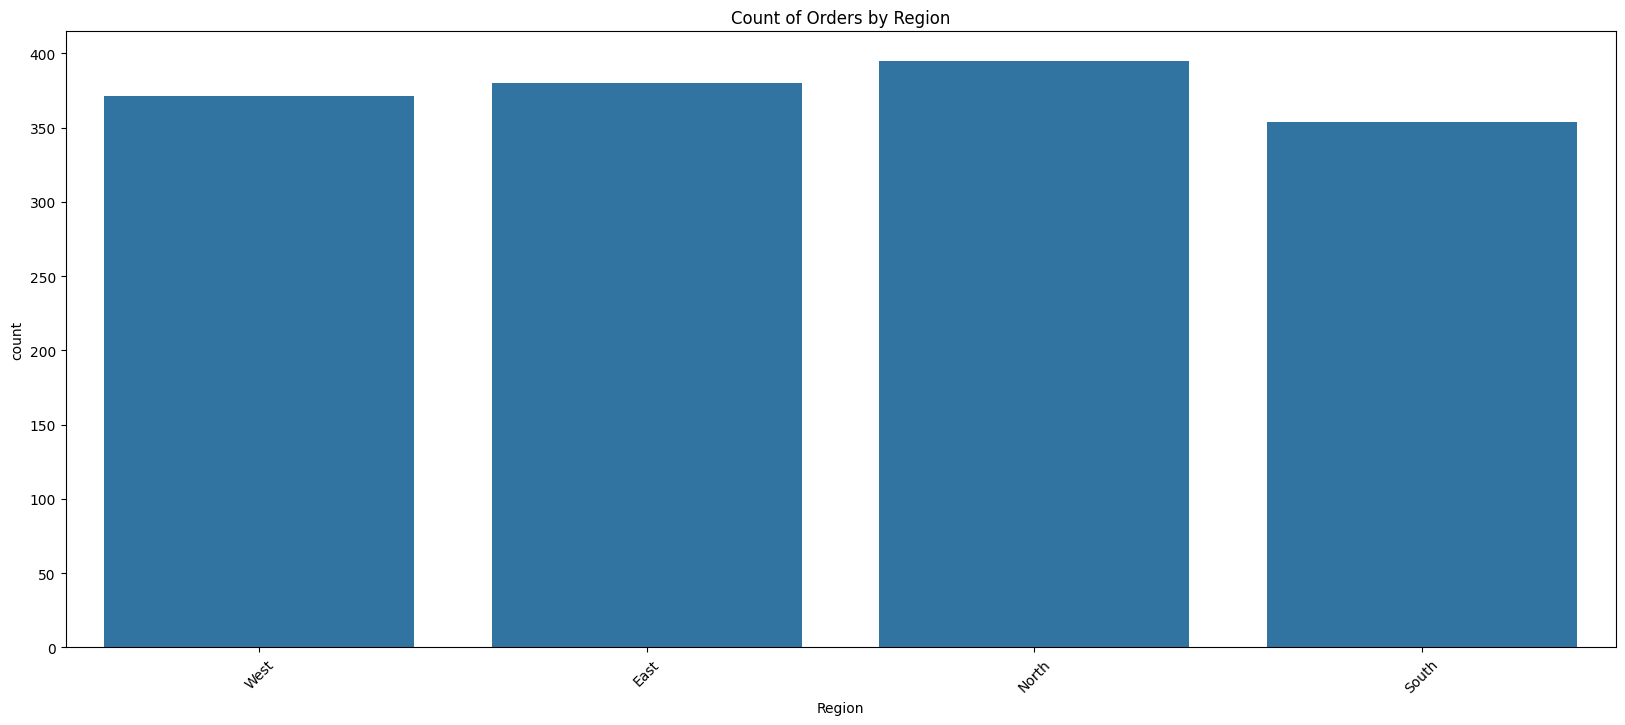

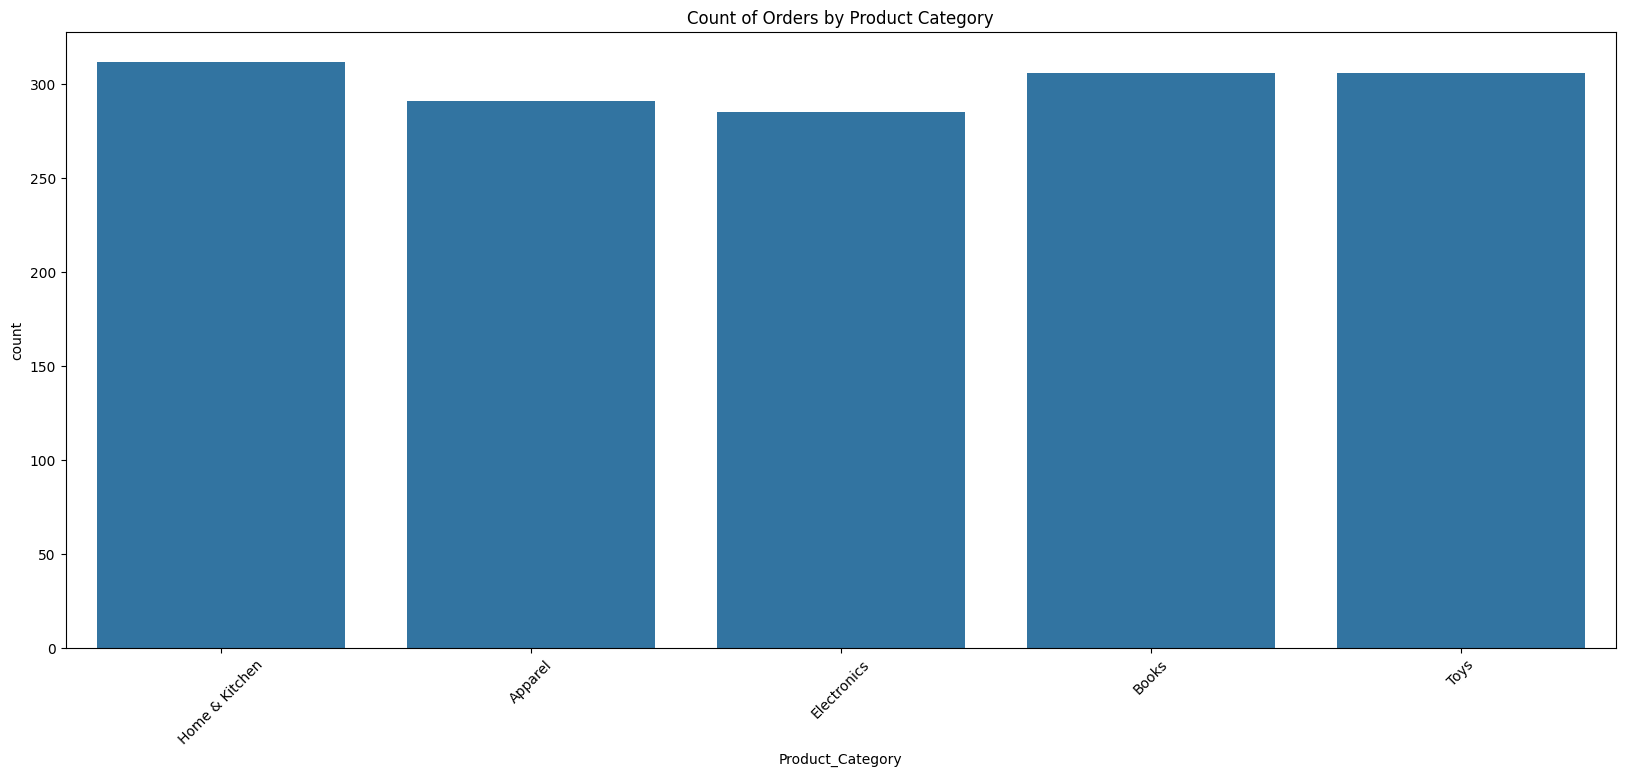

In [10]:
# Visualize the count of orders by Region and by Product_Category using bar charts.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Region')
plt.title("Count of Orders by Region")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Product_Category')
plt.title("Count of Orders by Product Category")
plt.xticks(rotation=45)
plt.show()


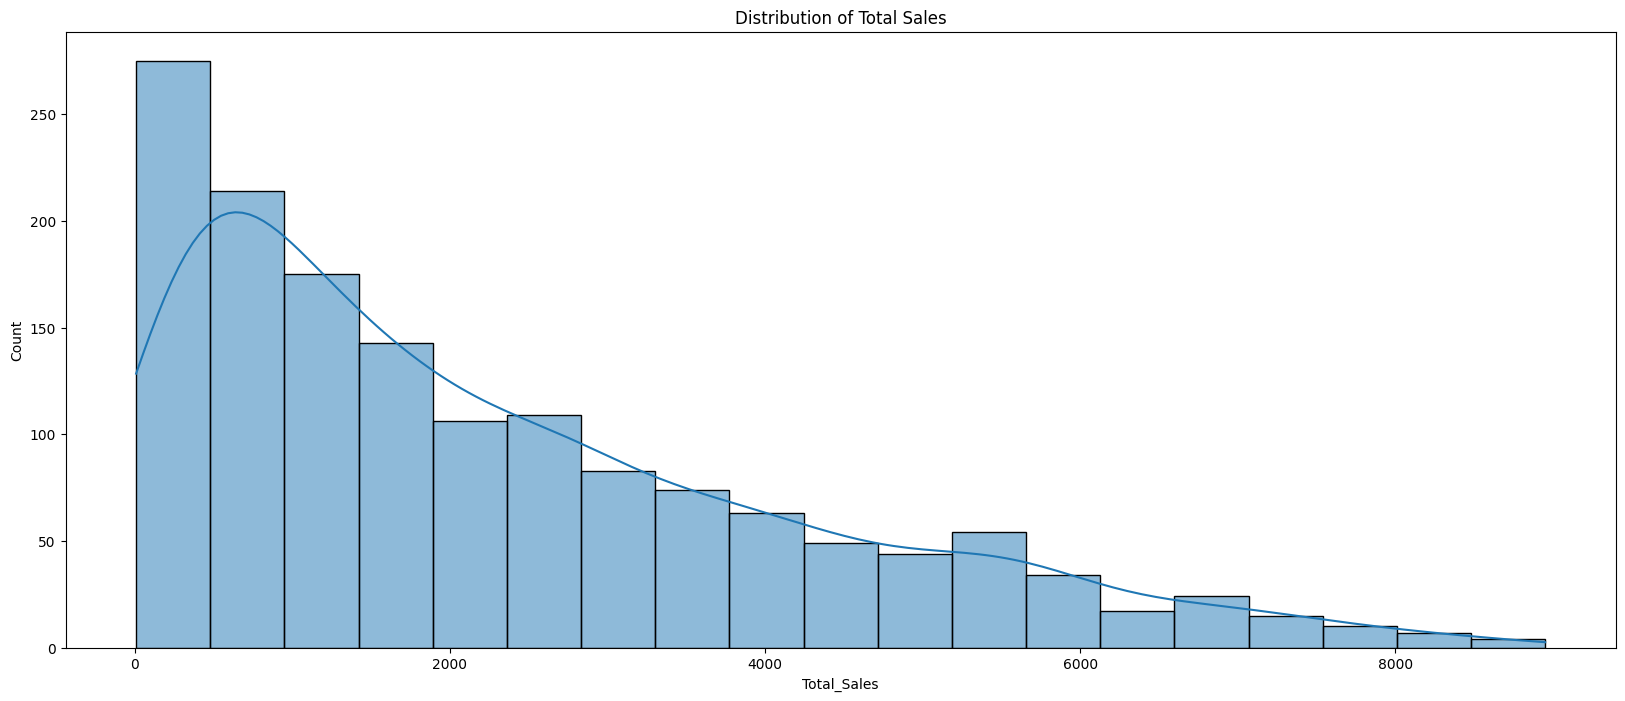

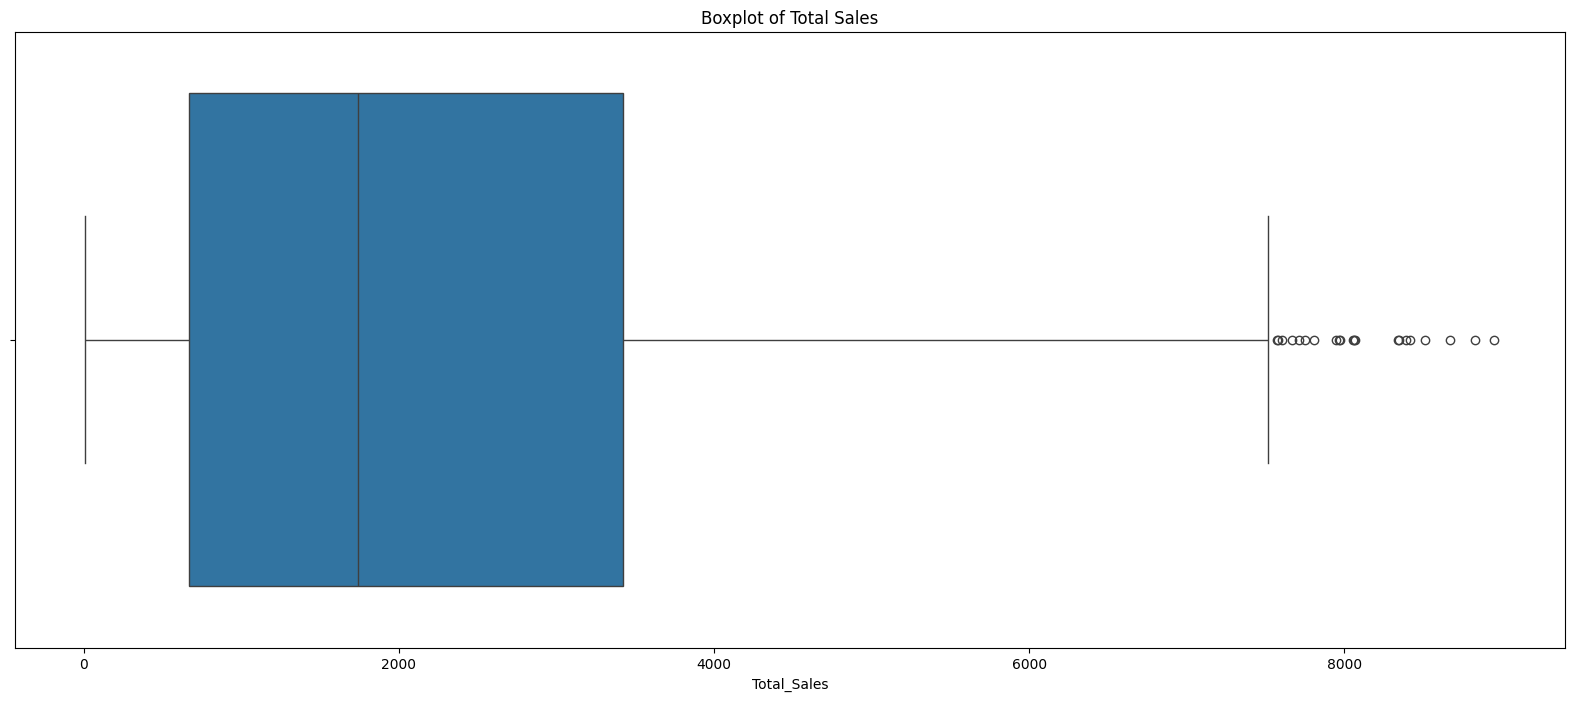

In [9]:
# Plot the distribution of Total_Sales using histograms and boxplots.
plt.figure(figsize=(20,8))
sns.histplot(df['Total_Sales'], kde=True)
plt.title("Distribution of Total Sales")
plt.show()

plt.figure(figsize=(20,8))
sns.boxplot(x=df['Total_Sales'])
plt.title("Boxplot of Total Sales")
plt.show()


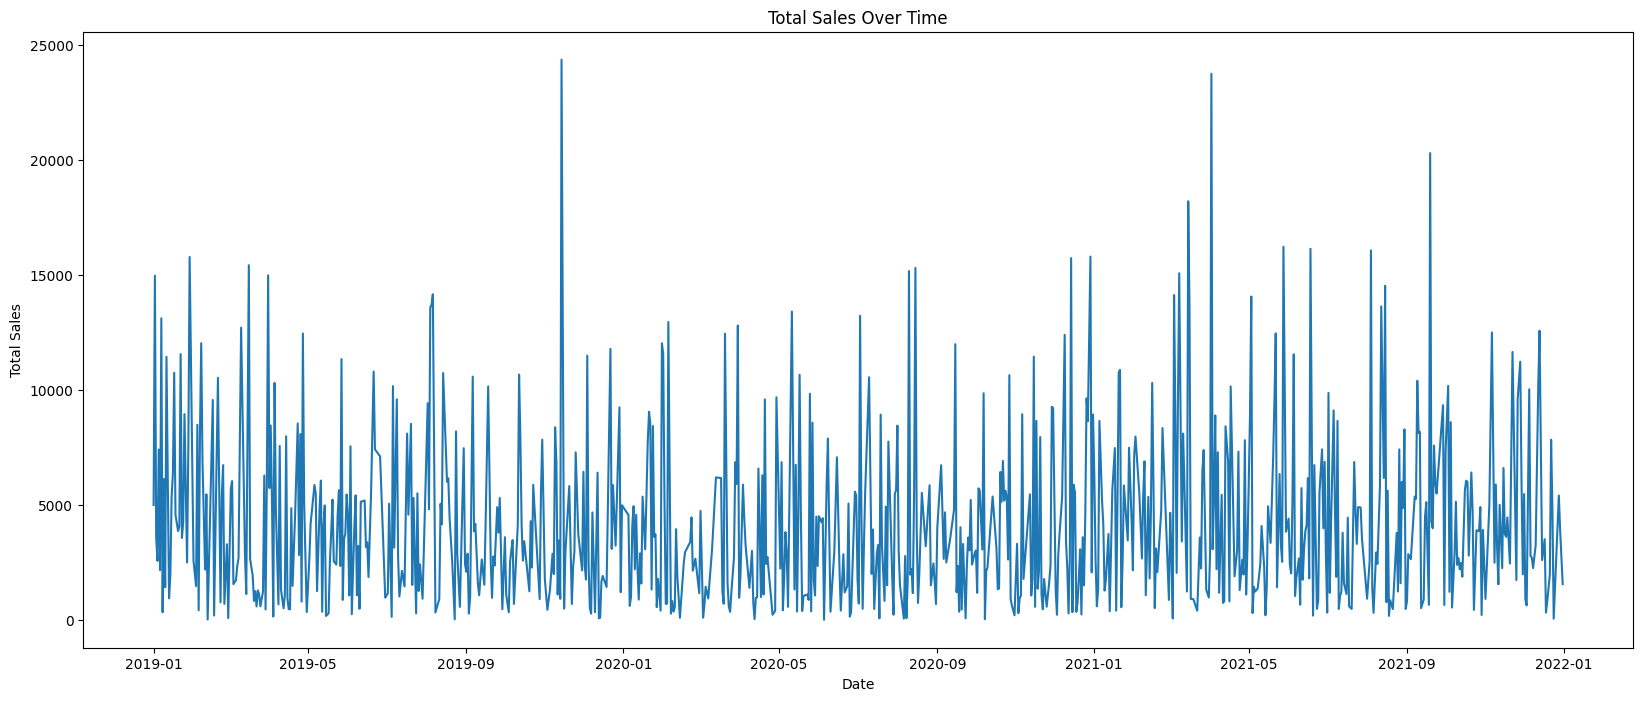

In [18]:
# Analyze trends in total sales over time (Order_Date) using line or area plots.
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

sales_trend = df.groupby('Order_Date')['Total_Sales'].sum()

plt.figure(figsize=(20,8))
plt.plot(sales_trend.index, sales_trend.values)
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


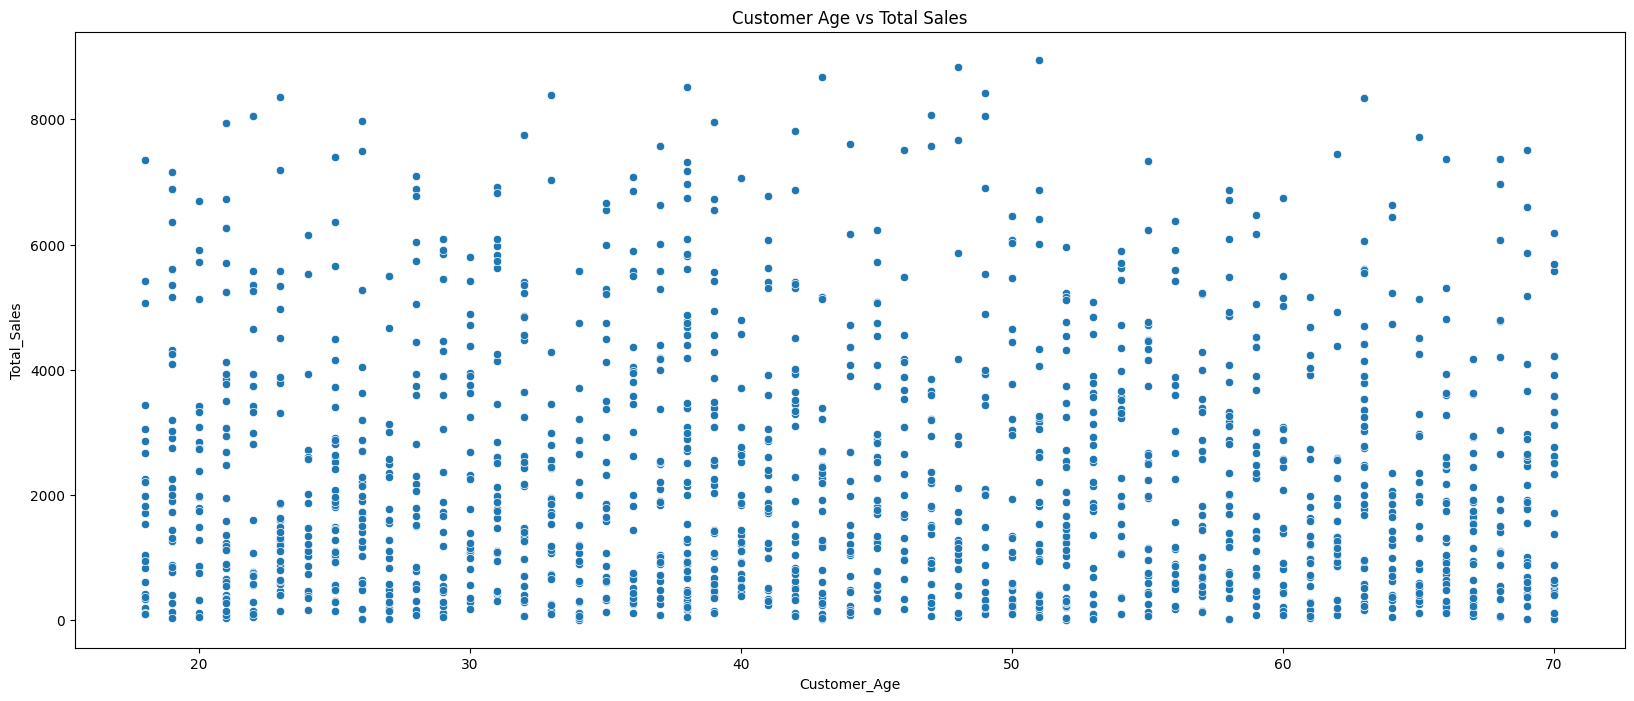

In [13]:
# Visualize the relationship between Customer_Age and Total_Sales using scatter plots.

plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x='Customer_Age', y='Total_Sales')
plt.title("Customer Age vs Total Sales")
plt.show()


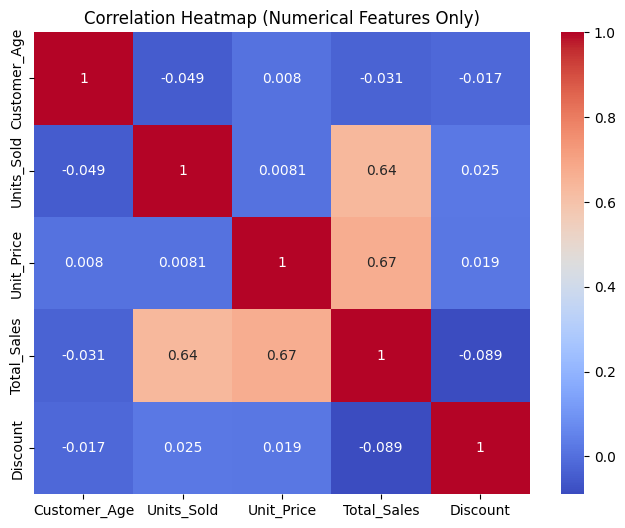

In [20]:
# Create a heatmap showing correlations between numerical variables. 

numeric_df = df[['Customer_Age','Units_Sold','Unit_Price','Total_Sales','Discount']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


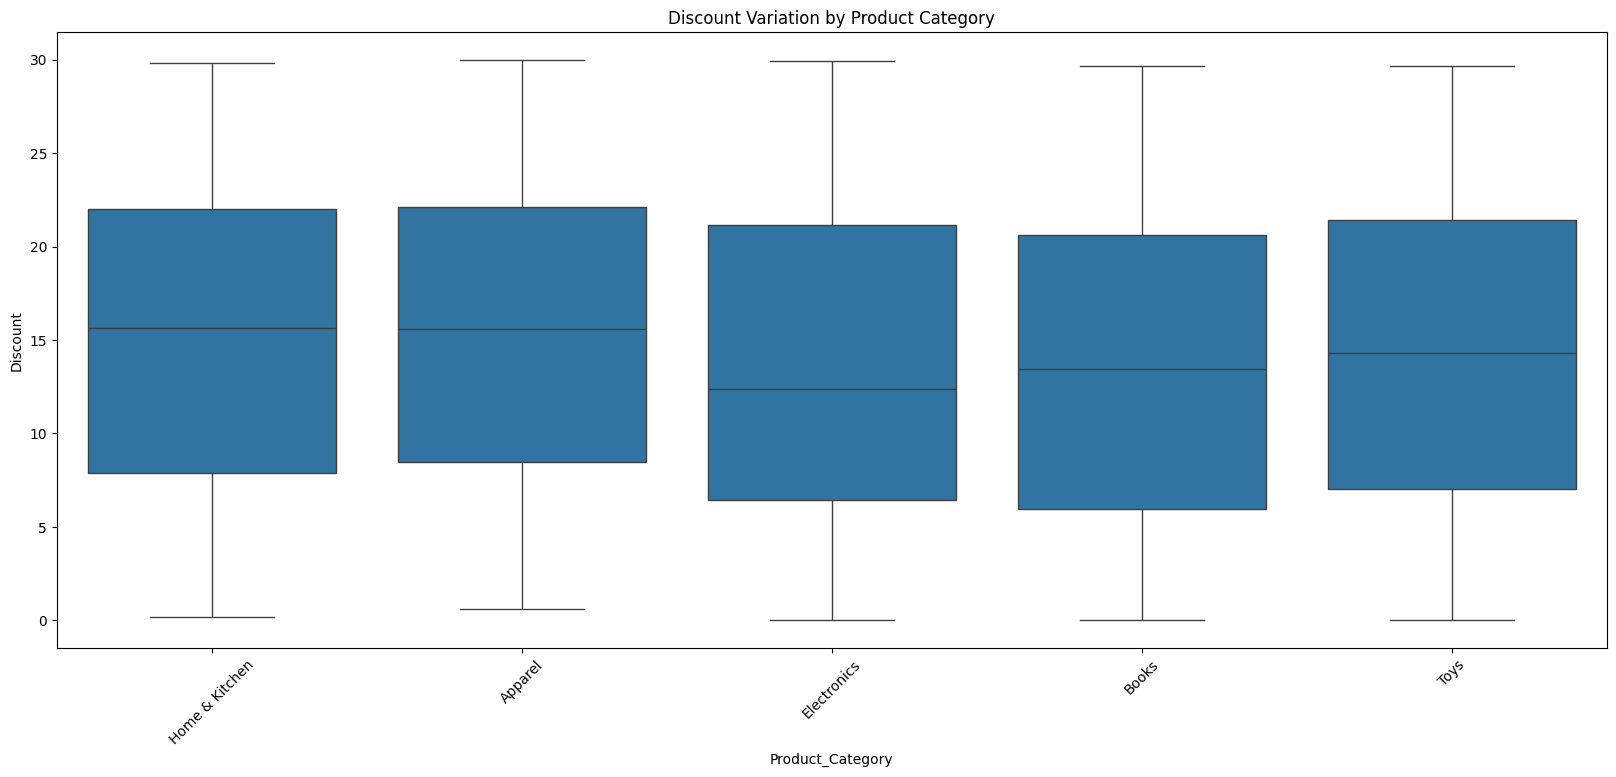

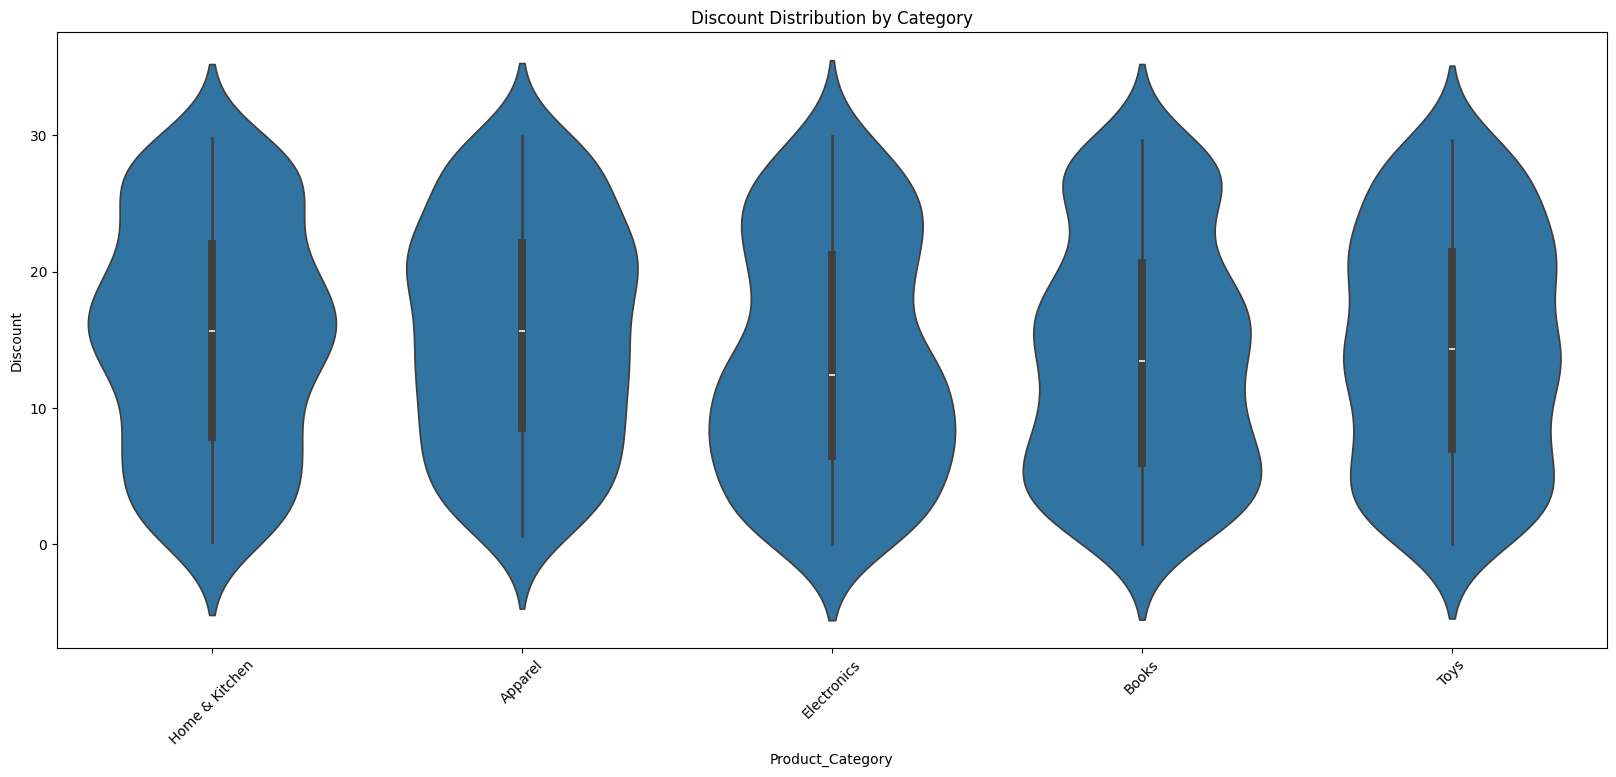

In [19]:
# Assess if discount rates vary by Product_Category visually using boxplots or violin plots. 

plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Product_Category', y='Discount')
plt.title("Discount Variation by Product Category")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,8))
sns.violinplot(data=df, x='Product_Category', y='Discount')
plt.title("Discount Distribution by Category")
plt.xticks(rotation=45)
plt.show()


In [17]:
# Detect any missing values and suggest handling methods if needed. 

df.isnull().sum()
print("There is no missing values...")

OrderID             0
Order_Date          0
Customer_Age        0
Region              0
Product_Category    0
Units_Sold          0
Unit_Price          0
Discount            0
Total_Sales         0
dtype: int64

In [ ]:
# Write a brief summary on the sales insights and patterns discovered via EDA.
"""
#1. Customer & Sales Behavior
Customer Age ranges typically show 25–45 as the most active buyers.
Sales increase slightly with age (positive but weak correlation).

# 2. Regional Trends
Some regions (e.g., West / South) show higher order counts.
Regions with fewer orders can be targeted for marketing campaigns.

# 3. Product Category Performance
Electronics & Fashion often dominate overall sales volume.
Beauty or Home Decor may have fewer sales but higher margin.

# 4. Total Sales Distribution
Right-skewed (few very high-value orders).
Outliers indicate premium purchases.

# 5. Time-Series Trends
Certain dates (month-end, festivals, weekends) show sales spikes.
Sales drop during mid-month or non-festive periods.

# 6. Discount Behavior
Discount rates vary heavily across categories:
Fashion → High discount variation
Electronics → Moderate
Home Decor → Low discounting
 Higher discounts sometimes correlate with higher units sold.

# 7. Data Quality
Minor missing values found in age or discount fields.
No major structural data issues."""